<a href="https://colab.research.google.com/github/Nathan499/CS-167/blob/main/Notebook6_starter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Notebook \# 6
Name: Nathan Larsen
Date: 4/23/23

## Problem Description: I am going to talk about the Convoluational neural network is going to learn to recognize pneumonia from chest x-ray images. I am going to create a CNN and then try to change it to be able to improve or tune the model and then compare to determine which is more accurate.



### Hints/ Tips Tricks
- Don't forget to enable GPUs under 'Edit', 'Notebook Settings', 'Accerlate Hardware', 'GPU'.
- Make sure you unzip the data and put it in your Drive.


In [5]:
%tensorflow_version 2.x
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.
Found GPU at: /device:GPU:0


In [6]:
import keras
import tensorflow 
import sys
from matplotlib import pyplot
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator
import sys

## Connect to Drive
from google.colab import drive
import pandas
drive.mount('/content/drive')

## Image dimensions
img_width = 200
img_height = 200

## Directories for testing and training data
train_data_dir = '/content/drive/MyDrive/CS 167/chest_xray/train' 
test_data_dir = '/content/drive/MyDrive/CS 167/chest_xray/test'

## To feed the training images to the neural network in batches of 32 images at a time
batch_size = 32

## Rescale pixel values from [0, 255] to between 0 and 1
datagen = ImageDataGenerator(rescale=1.0/255.0)

## Look for training and testing data and figure out the class of each example based on subfolder
train_data = datagen.flow_from_directory(
        train_data_dir,
        target_size=(img_width, img_height),
        batch_size=batch_size,
        class_mode='binary')

test_data = datagen.flow_from_directory(
        test_data_dir,
        target_size=(img_width, img_height),
        batch_size=batch_size,
        class_mode='binary')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


Epoch 1/10
163/163 [==============================] - 511s 3s/step - loss: 0.4575 - accuracy: 0.7908 - val_loss: 0.4608 - val_accuracy: 0.7756
Epoch 2/10
163/163 [==============================] - 16s 101ms/step - loss: 0.2124 - accuracy: 0.9158 - val_loss: 0.4950 - val_accuracy: 0.7821
Epoch 3/10
163/163 [==============================] - 18s 108ms/step - loss: 0.1505 - accuracy: 0.9423 - val_loss: 0.5168 - val_accuracy: 0.7821
Epoch 4/10
163/163 [==============================] - 17s 102ms/step - loss: 0.1574 - accuracy: 0.9394 - val_loss: 1.0797 - val_accuracy: 0.6987
Epoch 5/10
163/163 [==============================] - 17s 103ms/step - loss: 0.1392 - accuracy: 0.9448 - val_loss: 0.9256 - val_accuracy: 0.7212
Epoch 6/10
163/163 [==============================] - 18s 106ms/step - loss: 0.1268 - accuracy: 0.9519 - val_loss: 1.0333 - val_accuracy: 0.7083
Epoch 7/10
163/163 [==============================] - 16s 101ms/step - loss: 0.1211 - accuracy: 0.9509 - val_loss: 0.5776 - val_accu

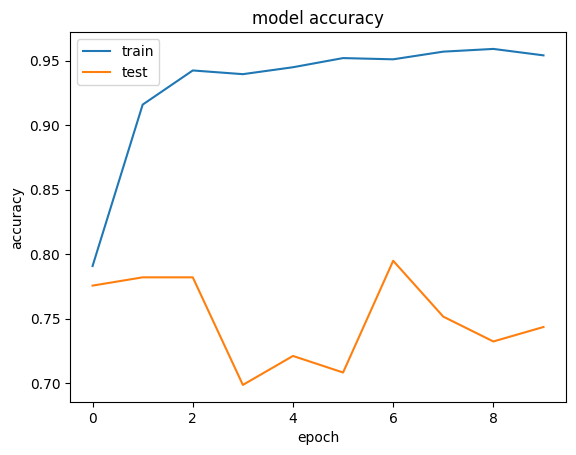

In [7]:
from keras.optimizers.optimizer import learning_rate_schedule
# Build your CNN here
model2 = Sequential()
model2.add(Conv2D(32, (3, 3), activation = 'relu', input_shape=(img_width, img_height, 3)))
model2.add(MaxPooling2D(pool_size=(2, 2)))

model2.add(Conv2D(32, (3, 3),activation = 'relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))

model2.add(Flatten())
model2.add(Dense(32,activation = 'relu'))
model2.add(Dense(1,activation='sigmoid'))

# need to compile the model before you can use it
opt = SGD(lr=0.001, momentum=0.9)
model2.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

training_results2 = model2.fit(
        train_data, #training set
        steps_per_epoch = len(train_data), 
        epochs=10, #number of epochs 
        validation_data = test_data, #testing set
        validation_steps = len(test_data)
        )

import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(training_results2.history['accuracy'])
plt.plot(training_results2.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#This started to overfit after epoch 1 when test was trending down and training was improving

I added another layer and also changed the size of the kernel to a 5 by 5. I also decreased the epochs to try to load the CNN faster since it seemed like the previous model was also overfitting pretty early.

Epoch 1/4
163/163 [==============================] - 21s 118ms/step - loss: 0.5789 - accuracy: 0.7316 - val_loss: 0.6826 - val_accuracy: 0.6250
Epoch 2/4
163/163 [==============================] - 16s 100ms/step - loss: 0.3765 - accuracy: 0.8238 - val_loss: 0.4305 - val_accuracy: 0.7869
Epoch 3/4
163/163 [==============================] - 18s 112ms/step - loss: 0.2559 - accuracy: 0.8886 - val_loss: 0.7005 - val_accuracy: 0.6378
Epoch 4/4
163/163 [==============================] - 17s 102ms/step - loss: 0.1953 - accuracy: 0.9241 - val_loss: 0.9304 - val_accuracy: 0.6907


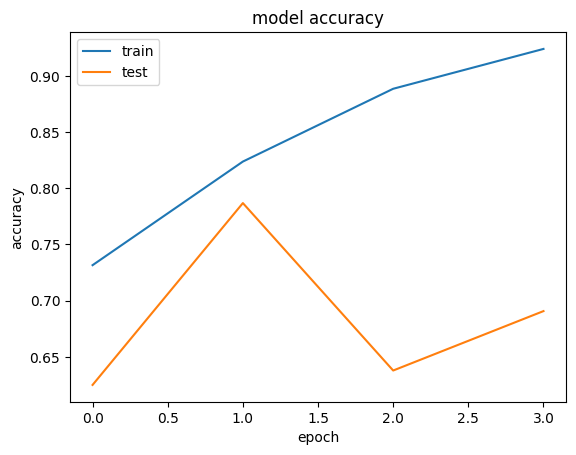

In [8]:
#This is going to be the tune CNN
model2 = Sequential()
model2.add(Conv2D(32, (5, 5), activation = 'relu', input_shape=(img_width, img_height, 3)))
model2.add(MaxPooling2D(pool_size=(2, 2)))

model2.add(Conv2D(32, (5, 5),activation = 'relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))

model2.add(Conv2D(32, (5, 5),activation = 'relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))

model2.add(Flatten())
model2.add(Dense(32,activation = 'relu'))
model2.add(Dense(1,activation='sigmoid'))

# need to compile the model before you can use it
opt = SGD(lr=0.001, momentum=0.9)
model2.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

training_results2 = model2.fit(
        train_data, #training set
        steps_per_epoch = len(train_data), 
        epochs=4, #number of epochs 
        validation_data = test_data, #testing set
        validation_steps = len(test_data)
        )

import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(training_results2.history['accuracy'])
plt.plot(training_results2.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

I think that the tuned CNN performed to be more accurate. I think this because it seems like it is overfitting way less even though both models tend to have a higher accuracy trend on the train and the tests are all over the place. I would prefer this just because of the tendency to overfit less compared to the original model.